In [ ]:
import numpy as np
import h5py
from einops import rearrange

import matplotlib.pyplot as plt

from src.qm_utils.lattice.lattice import Lattice2D

from brillouin_zones import construct_brillouin_zones

In [ ]:
sqrt3 = np.sqrt(3)
e1 = np.array([1, 0])
e2 = np.array([0, 1])
a_M = 1
lB = ((sqrt3 / (4 * np.pi)) ** 0.5) * a_M
a1 = a_M * e2
a2 = a_M * ((-sqrt3 / 2) * e1 + (1 / 2) * e2)
lattice = Lattice2D(np.stack([a1, a2]))
recip_lattice = lattice.reciprocal()
b = (4 * np.pi) / (a_M * sqrt3)
b1, b2 = lattice.reciprocal_lattice_vectors
b3 = -(b1 + b2)

bz = construct_brillouin_zones(lattice)
bz_27 = bz[27]

In [3]:
ac_ff_path = "/home/cwpark/acband-laughlin-instability/ac_ff.npy"
G_coords_path = "/home/cwpark/acband-laughlin-instability/G_coords.npy"


with open(ac_ff_path, 'rb') as f:
    ac_ff = np.load(f)

with open(G_coords_path, 'rb') as f:
    G_coords = np.load(f)

In [4]:
filename = '/home/cwpark/acband-laughlin-instability/data/h5/julia_ref1118.h5'

# 파일을 읽기 모드('r')로 엽니다.
with h5py.File(filename, 'r') as f:
    ff_Lambda_ref = rearrange(np.array(f['ff_Lambda']), 'm n g -> g n m')
    Qs = np.array(f['Qs'])
    BZ0 = np.array(f['BZ0'])
    BZu = np.array(f['BZu'])
    BZd = np.array(f['BZd'])

In [5]:
G_points = recip_lattice.get_points(G_coords)

In [6]:
Gx, Gy = rearrange(G_points, 'x y d -> d (x y)')

In [7]:
Qx, Qy = Qs[0, :], Qs[1, :]

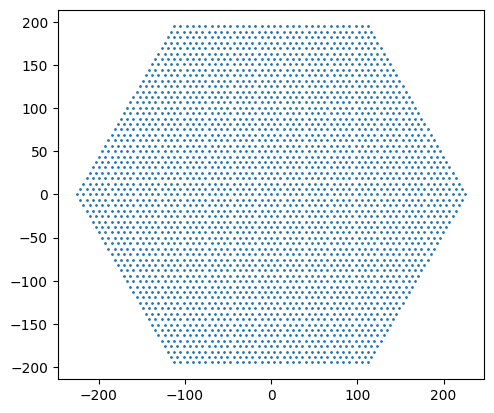

In [8]:
plt.scatter(Qx, Qy, s=1)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

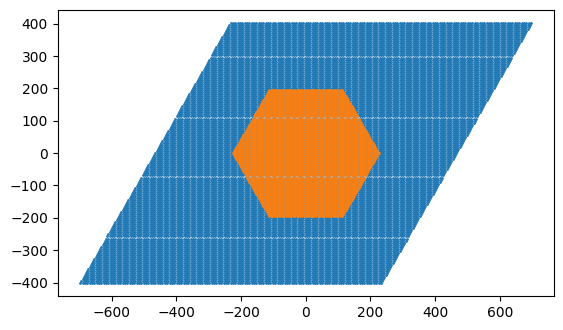

In [9]:
plt.scatter(Gx, Gy, s=1)
plt.scatter(Qx, Qy, s=1)
# plt.xlim(-10, 10)
# plt.ylim(-10, 10)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

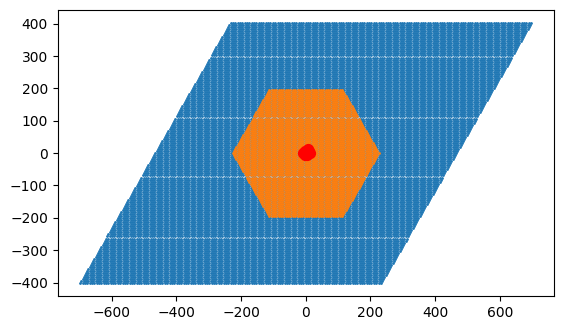

In [10]:
plt.scatter(Gx, Gy, s=1)
plt.scatter(Qx, Qy, s=1)
plt.scatter(Qx[:10], Qy[:10], s=50, c='red')
# plt.xlim(-10, 10)
# plt.ylim(-10, 10)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [11]:
Q_coords, eps = recip_lattice.divmod(rearrange(Qs, 'd n -> n d'))

In [12]:
Q_indices = Q_coords - G_coords[0, 0]

In [13]:
Q_points = G_points[Q_indices[:, 0], Q_indices[:, 1]]

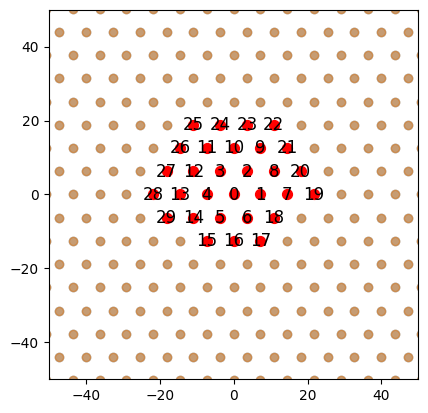

In [14]:
plt.scatter(Gx, Gy, alpha=0.5)
plt.scatter(Qx, Qy, alpha=0.5)
N = 30
plt.scatter(Qx[:N], Qy[:N], s=50, c='red')
for i in range(N):
    x = Qx[i]
    y = Qy[i]
    plt.text(x, y, f"{i}", fontsize=12, color="k", ha='center', va='center')

plt.xlim(-50, 50)
plt.ylim(-50, 50)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [15]:
BZ0.shape, BZu.shape, BZd.shape

((27, 2), (27, 2), (27, 2))

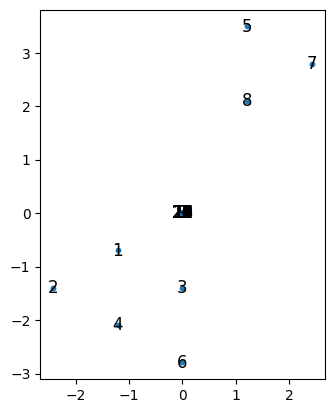

In [16]:
# plt.scatter(Qx, Qy, c='red')


_, offsets = recip_lattice.divmod(BZu)

plt.scatter(offsets[:, 0], offsets[:, 1], s=10)
# plt.scatter(BZu[:, 0], BZu[:, 1], s=10)
# plt.scatter(BZd[:, 0], BZd[:, 1], s=10)


N = 27
for i in range(N):
    x = BZu[i, 0]
    y = BZu[i, 1]
    _, (x, y) = recip_lattice.divmod(np.array([x, y]))
    plt.text(x, y, f"{i}", fontsize=12, color="k", ha='center', va='center')

# plt.xlim(-8, 8)
# plt.ylim(-8, 8)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [17]:
ff_Lambda_ref.shape

(2977, 27, 27)

In [18]:
coord, eps = bz_27.bz_sample_lattice.divmod(BZu)
np.max(np.abs(eps))

array([[-0.        ,  0.        ],
       [-1.20919958, -0.6981317 ],
       [-2.41839915, -1.3962634 ],
       [-3.62759873,  4.88692191],
       [-1.20919958, -2.0943951 ],
       [-2.41839915, -2.7925268 ],
       [-3.62759873,  3.4906585 ],
       [-4.8367983 ,  2.7925268 ],
       [-2.41839915, -4.1887902 ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ]])

In [ ]:
jl_to_py = np.array([bz_27.idx_from_coord(c) for c in coord])

In [ ]:
py_to_jl = np.argsort(jl_to_py)

In [20]:
ff_Lambda = ac_ff[Q_indices[:, 0], Q_indices[:, 1]]
ff_Lambda = ff_Lambda[:, :, py_to_jl, py_to_jl]

IndexError: arrays used as indices must be of integer (or boolean) type

In [ ]:
np.max(np.abs(ff_Lambda - ff_Lambda_ref))

np.float64(1.152600281455382)